# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [187]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys_challenge6 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [188]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [194]:
# Set the API base URL
api_key = "db2f210c0616966885a0d44dd6b175b9"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
url = f"{base_url}appid={api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
print()

for i, city in enumerate(cities):
    
    response = requests.get(url+city)
    status = response.status_code
    
    if status == 200:
        print(f"Processing City #{i+1}: {city}")
        city_weather = response.json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        date = city_weather["dt"]
        city_date = datetime.fromtimestamp(date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
        
    else:
        print(f"ERROR: {city} not found. Skipping")

        
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------

Processing City #1: port elizabeth
Processing City #2: yellowknife
Processing City #3: hithadhoo
Processing City #4: puerto natales
Processing City #5: usogorsk
Processing City #6: albany
Processing City #7: tura
Processing City #8: punta arenas
Processing City #9: puerto ayacucho
Processing City #10: longyearbyen
Processing City #11: blackmans bay
Processing City #12: crane
Processing City #13: avarua
Processing City #14: nizhnesortymskiy
Processing City #15: colorines
Processing City #16: djibo
Processing City #17: rondonopolis
Processing City #18: mount isa
Processing City #19: st. john's
Processing City #20: aljezur
Processing City #21: prado
Processing City #22: talnakh
Processing City #23: bethel
Processing City #24: conchal
Processing City #25: happy valley-goose bay
Processing City #26: sitka
Processing City #27: vilyuchinsk
Processing City #28: puerto ayora
Processing City #29: waitangi
Processing City #30: rio grand

Processing City #258: lagunas
Processing City #259: alaghsas
Processing City #260: swift current
Processing City #261: dalnegorsk
Processing City #262: sinop
Processing City #263: pitimbu
Processing City #264: tambacounda
Processing City #265: yeniseysk
Processing City #266: mata-utu
Processing City #267: petropavlovsk-kamchatsky
Processing City #268: okulovka
Processing City #269: sampit
Processing City #270: howard springs
Processing City #271: noosa heads
Processing City #272: new norfolk
Processing City #273: yaren
ERROR: kodok not found. Skipping
Processing City #275: margate
Processing City #276: pangkalanbuun
Processing City #277: gadzhiyevo
ERROR: san jose village not found. Skipping
Processing City #279: armacao de buzios
Processing City #280: nova sintra
Processing City #281: anadyr
Processing City #282: cartagena del chaira
Processing City #283: shahpur
Processing City #284: neustrelitz
Processing City #285: marksville
Processing City #286: zaysan
Processing City #287: guerr

Processing City #510: manicore
Processing City #511: qaqortoq
Processing City #512: quelimane
Processing City #513: saldanha
Processing City #514: la sarre
Processing City #515: chinchilla
Processing City #516: mont-dore
Processing City #517: ayaviri
Processing City #518: bogale
Processing City #519: anna regina
Processing City #520: yoichi
Processing City #521: taro
Processing City #522: kipushi
Processing City #523: ambon
Processing City #524: san pedro pochutla
Processing City #525: roma
Processing City #526: ruteng
Processing City #527: ahar
Processing City #528: vorgashor
Processing City #529: jahazpur
Processing City #530: bangassou
Processing City #531: maceio
Processing City #532: harar
Processing City #533: punta del este
Processing City #534: ridder
Processing City #535: bollene
Processing City #536: yorkton
Processing City #537: yilan
Processing City #538: zemetchino
Processing City #539: ratnagiri
Processing City #540: romblon
Processing City #541: angra do heroismo
Process

In [195]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [196]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,15.16,88,0,5.66,ZA,2023-07-22 11:33:48
1,yellowknife,62.4560,-114.3525,19.29,63,75,3.60,CA,2023-07-22 11:30:32
2,hithadhoo,-0.6000,73.0833,28.17,74,71,2.50,MV,2023-07-22 11:30:03
3,puerto natales,-51.7236,-72.4875,0.29,76,28,1.67,CL,2023-07-22 11:33:49
4,usogorsk,63.4106,48.6872,14.59,88,46,1.32,RU,2023-07-22 11:33:49


In [197]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\nrhl1\OneDrive\Desktop\UTBootcamp\Challenges\python-api-challenge\Starter_Code\output_data\cities.csv", index_label="City_ID")

In [198]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\nrhl1\OneDrive\Desktop\UTBootcamp\Challenges\python-api-challenge\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,15.16,88,0,5.66,ZA,2023-07-22 11:33:48
1,yellowknife,62.4560,-114.3525,19.29,63,75,3.60,CA,2023-07-22 11:30:32
2,hithadhoo,-0.6000,73.0833,28.17,74,71,2.50,MV,2023-07-22 11:30:03
3,puerto natales,-51.7236,-72.4875,0.29,76,28,1.67,CL,2023-07-22 11:33:49
4,usogorsk,63.4106,48.6872,14.59,88,46,1.32,RU,2023-07-22 11:33:49


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

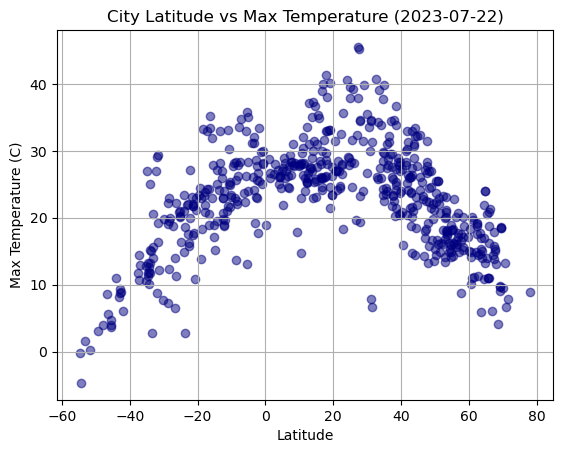

In [199]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Max Temp"], c="navy", alpha=0.5)
date = str(city_data_df["Date"][0])[0:10]

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.grid()

# Show plot
plt.show()

#### Latitude Vs. Humidity

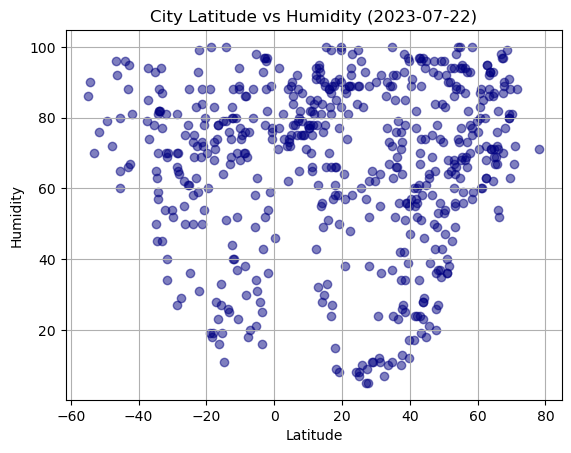

In [200]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Humidity"], c="navy", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity ({date})")
plt.grid()

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

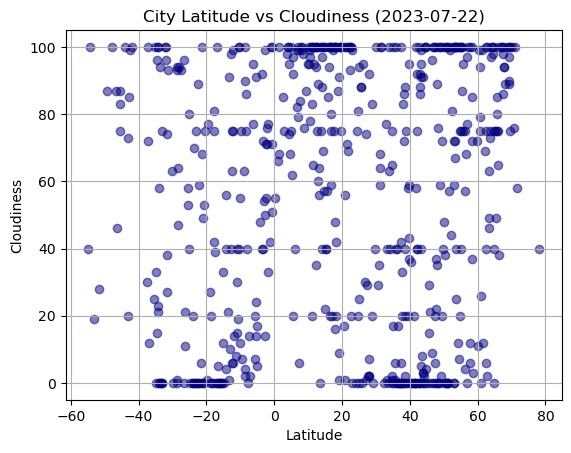

In [201]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"], c="navy", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.grid()

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

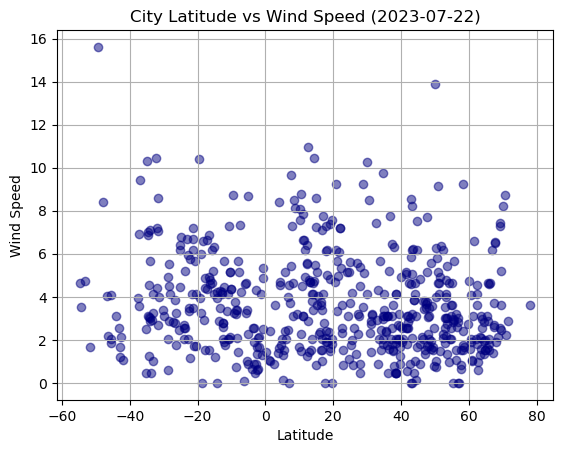

In [202]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Wind Speed"], c="navy", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [203]:
# Define a function to create Linear Regression plots
from scipy import stats

def linRegress(df, col1, col2, ylabel, xlabel, ypos, xpos):
    
    #Calculate Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[col1], df[col2])
    regress = df[col1] * slope + intercept
    
    #Create equation string
    eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #print r-value
    print(f"The r-value is: {rvalue}")

    #Create and output chart
    plt.figure(figsize=(10, 10), dpi=70)
    plt.scatter(x=df[col1], y=df[col2])
    plt.text(x=xpos, y=ypos, s=str(eq), c="red", fontsize=16)
    plt.plot(df[col1],regress, "r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()
    
    




In [204]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,19.29,63,75,3.60,CA,2023-07-22 11:30:32
4,usogorsk,63.4106,48.6872,14.59,88,46,1.32,RU,2023-07-22 11:33:49
5,albany,42.6001,-73.9662,26.08,61,0,0.89,US,2023-07-22 11:33:49
6,tura,25.5198,90.2201,24.67,96,88,2.01,IN,2023-07-22 11:33:49
8,puerto ayacucho,5.6639,-67.6236,26.00,84,97,2.42,VE,2023-07-22 11:30:06


In [205]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,15.16,88,0,5.66,ZA,2023-07-22 11:33:48
2,hithadhoo,-0.6000,73.0833,28.17,74,71,2.50,MV,2023-07-22 11:30:03
3,puerto natales,-51.7236,-72.4875,0.29,76,28,1.67,CL,2023-07-22 11:33:49
7,punta arenas,-53.1500,-70.9167,1.54,70,19,4.75,CL,2023-07-22 11:32:01
10,blackmans bay,-43.0167,147.3167,8.74,88,73,1.68,AU,2023-07-22 11:33:50


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6376899811950462


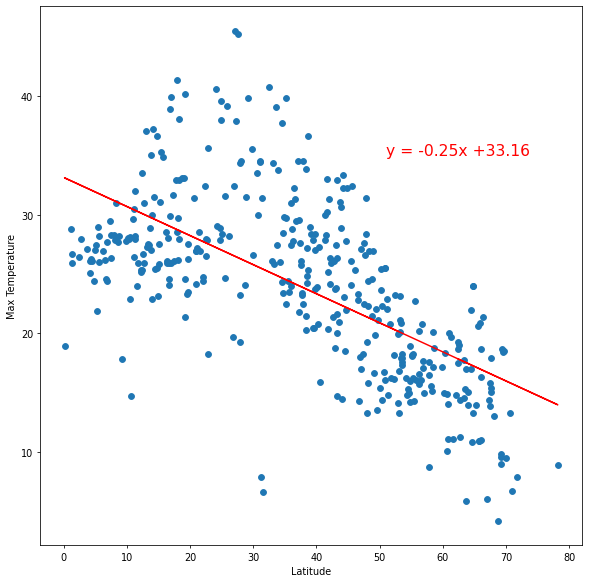

In [208]:
# Linear regression on Northern Hemisphere
linRegress(df=northern_hemi_df, col1="Lat", col2="Max Temp", ylabel="Max Temperature", xlabel="Latitude", xpos=51, ypos=35)

The r-value is: 0.7730549013275203


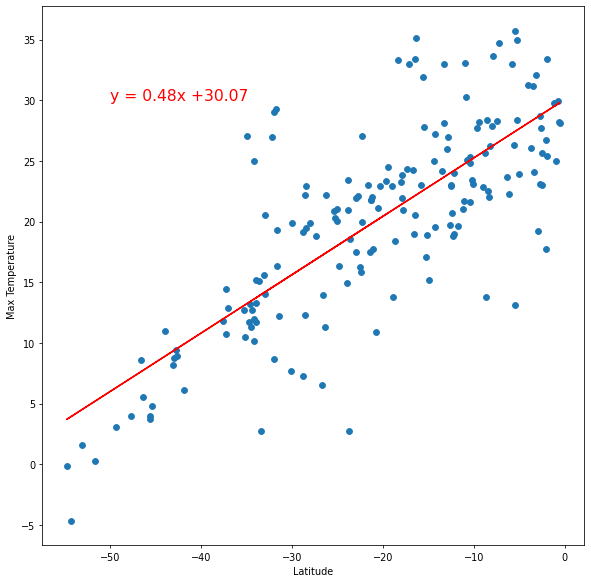

In [209]:
# Linear regression on Southern Hemisphere
linRegress(df=southern_hemi_df, col1="Lat", col2="Max Temp", ylabel="Max Temperature", xlabel="Latitude", xpos=-50, ypos=30)

**Discussion about the linear relationship:** The data in the scatterplots and the corresponding linear regressions intuitively make sense. As the point gets closer to the equator, the max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03626486765263279


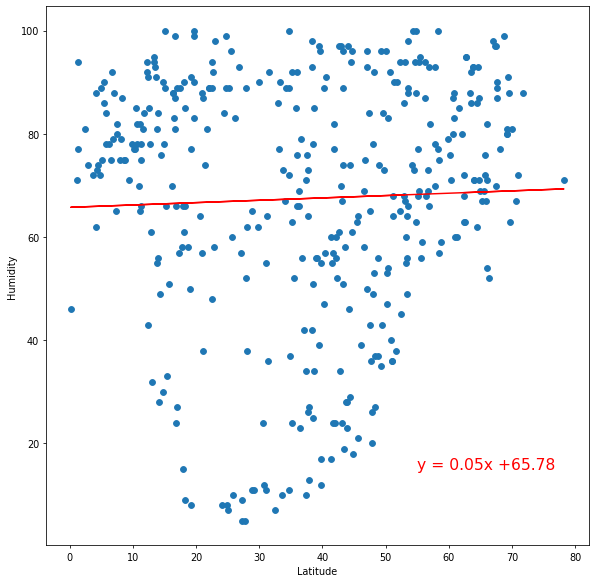

In [210]:
# Northern Hemisphere
linRegress(df=northern_hemi_df, col1="Lat", col2="Humidity", ylabel="Humidity", xlabel="Latitude", xpos=55, ypos=15)

The r-value is: -0.19602002166519528


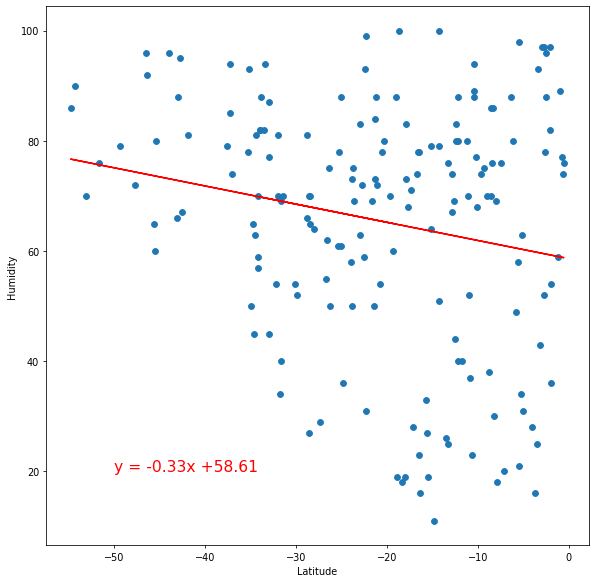

In [211]:
# Southern Hemisphere
linRegress(df=southern_hemi_df, col1="Lat", col2="Humidity", ylabel="Humidity", xlabel="Latitude", xpos=-50, ypos=20)

**Discussion about the linear relationship:** Ultimately it appears that as the point gets closer to the equator, the range in humidities increase. The correlation is very weak, but a trend is that as you get further away from the equator, humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0993723946346319


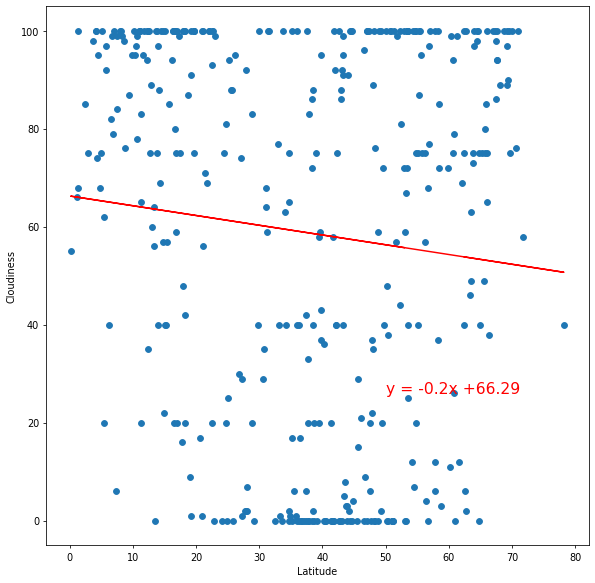

In [212]:
# Northern Hemisphere
linRegress(df=northern_hemi_df, col1="Lat", col2="Cloudiness", ylabel="Cloudiness", xlabel="Latitude", xpos=50, ypos=26)

The r-value is: -0.11878561032197284


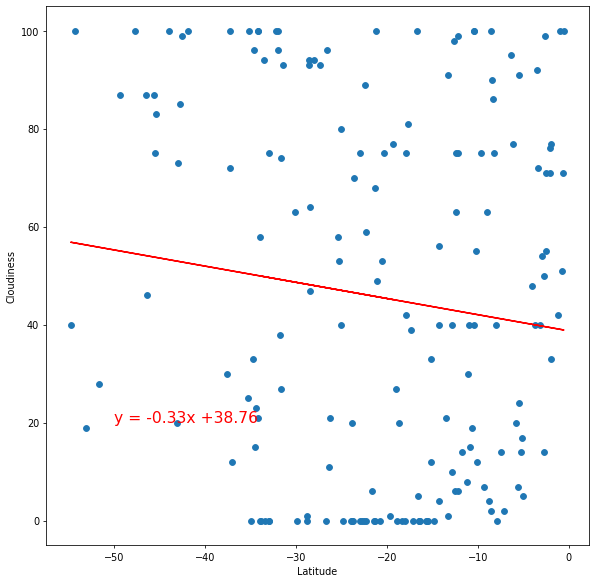

In [213]:
# Southern Hemisphere
linRegress(df=southern_hemi_df, col1="Lat", col2="Cloudiness", ylabel="Cloudiness", xlabel="Latitude", xpos=-50, ypos=20)

**Discussion about the linear relationship:** There does not seem to be a statistically significant relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14356706853771864


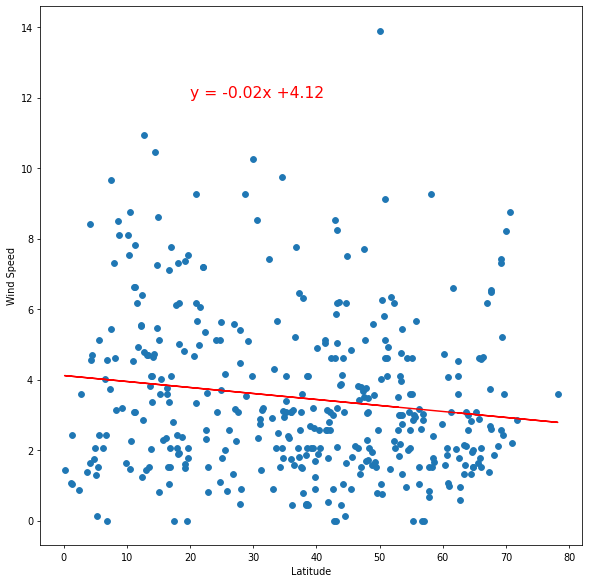

In [214]:
# Northern Hemisphere
linRegress(df=northern_hemi_df, col1="Lat", col2="Wind Speed", ylabel="Wind Speed", xlabel="Latitude", xpos=20, ypos=12)

The r-value is: -0.19306785999698178


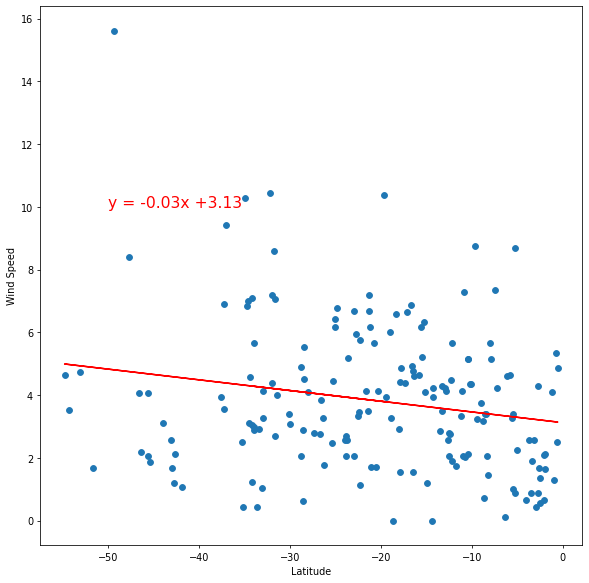

In [215]:
# Southern Hemisphere
linRegress(df=southern_hemi_df, col1="Lat", col2="Wind Speed", ylabel="Wind Speed", xlabel="Latitude", xpos=-50, ypos=10)

**Discussion about the linear relationship:** Although the relationship is weak, it appears that as the latitude increases, the wind speed increases. This is interesting because it does not seem to matter if you are on the northern or southern hemisphere.